<a href="https://www.bigdatauniversity.com"><img src="https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width="400" align="center"></a>

<h1 align="center"><font size="5">Classification with Python</font></h1>

# Background

Following the attack of humanitarian workers in Niger in August 2020, a movement #Notatarget has been broadcast on the networks with the reminding of the principles that each NGOs have to follow : neutrality, impartiality, independency, humanity.

Some terrorist groups deny this vision of neutrality, and consider the NGOs as a vehicle from Western countries to control and follow the local population. https://www.hstoday.us/subject-matter-areas/counterterrorism/isis-declares-humanitarian-aid-workers-are-legitimate-targets/

This question is all the more significant that :

Major NGOs fundings are from State or Institutional Donors.
Some official positions aren't clear as the French Foreign Office Statements : NGOs , under its fundings, work for France and its vision

# Problem

Could we prove that the Humanitarian Aids distribution, in its globally, is neutral from Western countries willings ? Could we set up a model correlating Aid volumes for a country over past ten years with the evolution of its Human Development Index (HDI) ?

# Data Understanding

We need two kind of datasets :

-Data on the Humanitarian Aid Volume. There is a website dedicated to this Financial Tracking Service(FTS) which is a centralized source of cdownloadable data and information on humanitarian funding flows. Government donors, UN-administered funds, UN agencies, NGOs and other humanitarian actors and partner. FTS is managed by the United Nations Office for the Coordination of Humanitarian Affairs (OCHA).

-Data on HDI: disclosed and managed also by the United Nations Office;

We can confirm the reliability of the data, and the consistency of the 2 datasets that are issued from the same organization.

# Data Preparation

We need to remove the countries that face wars as Syria and Yemen where the significant volume of aids couldn't fit in our model. Besides we 'll need to understand if there is an HDI threshold where a country do not receive international humanitarian aids? I'll also do an analysis of the split of aids from global donors in order to confirm their distribution are correlated.

# Data Cleaning

We'll don't have to normalize the dataset on HDI (between 0 to 1) .

On the volume aids, we 'll took in account only "Paid Contributions" and not commitments or pledges in order to take into account only the aids received by the countries.

In [134]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset on HDI index


Lets read the dataset

In [135]:
df = pd.read_excel("/Users/Desktop/Data HDI.xlsx")
df.head()

,Country,Global aid 2018,2013,2015,2016,2017,2018
0,Afghanistan,237378905,0.484962,0.490065,0.491278,0.493327,0.495960
1,Albania,0,0.781171,0.787724,0.787672,0.788709,0.791406
2,Andorra,0,0.846163,0.850159,0.853615,0.852317,0.856781
3,Angola,0,0.547266,0.564751,0.570058,0.575837,0.574488
4,Antigua and Barbuda,0,0.767348,0.769574,0.771861,0.773680,0.776163


### Data Visualization on HDI  2017 & 2018

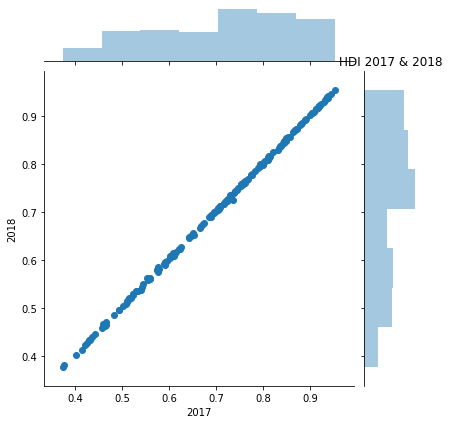

In [136]:
import seaborn as sns

plot = sns.jointplot( x ='2017',y='2018',data=df)
plt.title ('HDI 2017 & 2018')
plt.show()

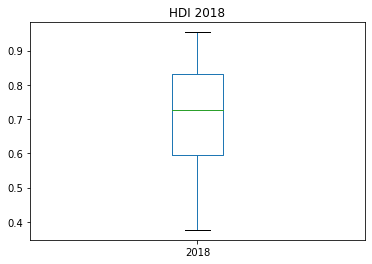

In [137]:
years= list(map(str, range (2013, 2018)))

df['2018'].plot (kind='box')
plt.title ('HDI 2018')
plt.show()

We split countries in four groups depending on our HDI 2018 based on the dataset

In [138]:
bins = np.linspace(min(df["2018"]), max(df["2018"]), 4)
bins
group_names = ['Low', 'Medium', 'High']
df['HDI-binned'] = pd.cut(df['2018'], bins, labels=group_names, include_lowest=True )
df[['2018','HDI-binned']].head(20)                  
              
                

,2018,HDI-binned
0,0.495960,Low
1,0.791406,High
2,0.856781,High
3,0.574488,Medium
4,0.776163,High
5,0.830096,High
6,0.760011,Medium
7,0.938379,High
8,0.913809,High
9,0.753869,Medium


In [139]:
df["HDI-binned"].value_counts()

High      78
Medium    70
Low       40
Name: HDI-binned, dtype: int64

Text(0.5, 1.0, 'HDI bins')

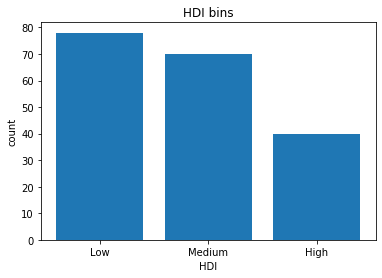

In [140]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_names, df["HDI-binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("HDI")
plt.pyplot.ylabel("count")
plt.pyplot.title("HDI bins")

In [141]:
df.to_csv('HDI-df.csv')

# Data on humanitarian aid



Let's compare humanitarian aid in 2018 between global and French Foreigne office 

In [142]:
df_aid = pd.read_excel("/Users/Desktop/Help Humanitarian.xlsx")
df.head()

,Country,Global aid 2018,2013,2015,2016,2017,2018,HDI-binned
0,Afghanistan,237378905,0.484962,0.490065,0.491278,0.493327,0.495960,Low
1,Albania,0,0.781171,0.787724,0.787672,0.788709,0.791406,High
2,Andorra,0,0.846163,0.850159,0.853615,0.852317,0.856781,High
3,Angola,0,0.547266,0.564751,0.570058,0.575837,0.574488,Medium
4,Antigua and Barbuda,0,0.767348,0.769574,0.771861,0.773680,0.776163,High


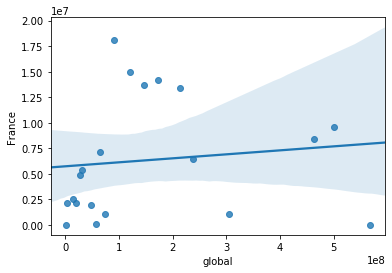

In [143]:
sns.regplot(x="global", y="France", data=df_aid)

In [144]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium

print('Folium installed and imported!')


Solving environment: done

# All requested packages already installed.

Folium installed and imported!


In [145]:
df_meae= pd.read_excel("/Users/Desktop/MEAE.xlsx")
df_meae.head()

,Pays de réalisation,Somme de Versements (euro),Moyenne de Latitude,Moyenne de Longitude
0,Afrique du Sud,5039437.000,-29.618889,24.853504
1,Bénin,962637.920,7.758015,2.313730
2,Bolivie,1592500.000,-17.416668,-67.513889
3,Brésil,1040936.000,-15.363899,-46.831969
4,Burundi,1992376.289,-3.352347,29.518069


In [146]:
# create a plain world map
world_map = folium.Map(location=[0, 0], zoom_start=2)
world_map.add_child(folium.GeoJson('/Users/julienbessi/Desktop/meae.geojson'))
# Display the map
display(world_map)


# Analysis HDI & Distribution Aid

Preprocessing data


In [147]:
print(df.dtypes)

Country              object
Global aid 2018       int64
2013                float64
2015                float64
2016                float64
2017                float64
2018                float64
HDI-binned         category
dtype: object


In [155]:
df[['HDI-binned']]= df[['HDI-binned']].astype('str')
df[["Global aid 2018"]] = df[["Global aid 2018"]].astype("int")
df[["2015", "2016"]] = df[["2015", "2016"]].astype("float")
print(df.dtypes)

Country             object
Global aid 2018      int64
2013               float64
2015               float64
2016               float64
2017               float64
2018               float64
HDI-binned          object
dtype: object


In [156]:

X = df[['2015','2016','2017','2018']]
y = df['Global aid 2018'].values
X[0:5]

,2015,2016,2017,2018
0,0.490065,0.491278,0.493327,0.495960
1,0.787724,0.787672,0.788709,0.791406
2,0.850159,0.853615,0.852317,0.856781
3,0.564751,0.570058,0.575837,0.574488
4,0.769574,0.771861,0.773680,0.776163


In [157]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-1.41556357, -1.43000017, -1.43977963, -1.44096061],
       [ 0.54444112,  0.52431517,  0.51444721,  0.51868046],
       [ 0.9555566 ,  0.95912023,  0.93527511,  0.95230387],
       [-0.92377719, -0.91055522, -0.89389938, -0.92009734],
       [ 0.42492603,  0.42006255,  0.41501607,  0.41757828]])

In [158]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (150, 4) (150,)
Test set: (38, 4) (38,)


## Knn neighbours

In [160]:
from sklearn.neighbors import KNeighborsClassifier
k = 4
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat = neigh.predict(X_test)
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))


Train set Accuracy:  0.8666666666666667
Test set Accuracy:  0.868421052631579


## Decision tree


Lets look at gender:

In [100]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)
Treeset = DecisionTreeClassifier(criterion="entropy", max_depth = 6)
Treeset.fit(X_trainset,y_trainset)
predTree = Treeset.predict(X_testset)

In [102]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.7543859649122807


## Support Vector machine

In [108]:
from sklearn import svm
clf = svm.SVC(kernel='linear') 
clf.fit(X_train, y_train)
yhat_SVM = clf.predict(X_test)

In [109]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat_SVM)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


0.868421052631579

## Logistic Regression

In [110]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
yhat_LR = LR.predict(X_test)
yhat_prob_LR = LR.predict_proba(X_test)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [111]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat_LR)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


0.868421052631579